In [1]:
import ganja.io as io

Welcome to ROOTaaS 6.06/05


In [31]:
from glob import glob
import os

reload(io)

base = '/scratch/musella/ganja'
version = 'nov2'
folders = glob(base+'/converted/'+version+'/QCD*')

#base = '/scratch/musella/ganja/prod_oct25_v0'
#folders = glob('%s/QCD*' % base)

inputs = {}
for folder in folders:
    files = list(map(lambda x: int(os.path.basename(x).replace('.json','')), glob('%s/*.json' % folder) ))
    # files = list(map(lambda x: int(os.path.basename(x).replace('.json','')), glob('%s/*.json' % folder)[:10] ))
    inputs[folder] = files
 

In [32]:
proc_ids,df = io.read_datasets(inputs)

In [33]:
df = df[df.ptGen>40.]
print(df.ptGen.min(),df.ptGen.max())

(40.000004, 3010.3926)


In [34]:
df.shape

(92874017, 12)

In [35]:
smpl = df.sample(10000000)

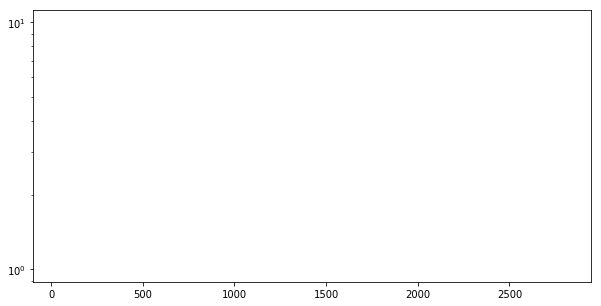

In [36]:
pt_wei,pt_bins,_=plt.hist(smpl.ptGen,bins=300,weights=smpl.weight)
plt.yscale('log')

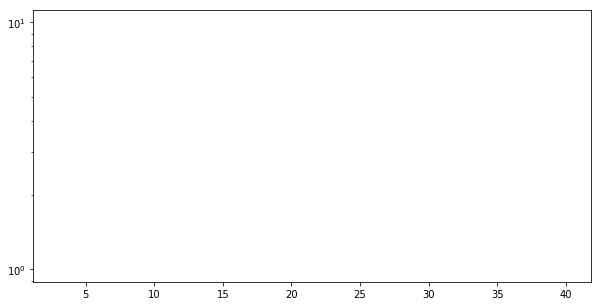

In [37]:
plt.hist(smpl.ptGen,bins=300,range=[3.,40.],weights=smpl.weight)
plt.yscale('log')

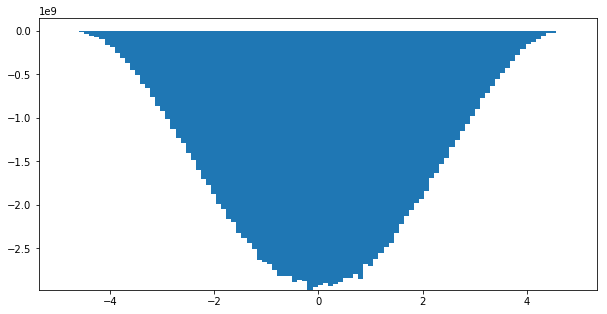

In [38]:
plt.hist(smpl.etaGen,bins=100,weights=smpl.weight);
# plt.yscale('log')

In [39]:
from matplotlib.colors import LogNorm
plt.hist2d(smpl.ptGen,smpl.etaGen,bins=500,range=[[20,2000],[-5,5]],
           weights=smpl.weight,norm=LogNorm(),cmap='Blues');
plt.xscale('log')
plt.colorbar()
plt.xlabel('$p_T$')
plt.ylabel('$\eta$')

# plt.zscale

ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: values must all be positive

In [ ]:
pt_evts,_,_=plt.hist(smpl.ptGen,bins=pt_bins)
plt.yscale('log')

In [ ]:
pt_evts,_,_=plt.hist(smpl.ptGen,bins=pt_bins)
plt.yscale('log')
plt.xscale('log')

In [ ]:
import GAN.preprocessing as preprocessing
reload(preprocessing)
# smpl.weight = 1./smpl.weight
# rewei = 1./pt_vals
# rewei = pt_wei / pt_evts
rewei = np.exp( -0.5*( (pt_bins[1:]+pt_bins[:-1]) - pt_bins[0] ) * 7e-3 ) / pt_evts
rewei [rewei == np.inf] = rewei.min()
# rewei *= pt_vals.sum()/rewei.sum()

In [ ]:
plt.scatter(0.5*(pt_bins[1:]+pt_bins[:-1]),rewei/rewei.max())

In [ ]:
weights = preprocessing.reweight(smpl,['ptGen'],[pt_bins],rewei,None,offset=False)

In [ ]:
from matplotlib.colors import LogNorm
pt_eta_hist = plt.hist2d(smpl.ptGen,smpl.etaGen,bins=500,range=[[20,2000],[-5,5]],
           weights=weights,cmap='Blues')#norm=LogNorm(),cmap='Blues');
plt.xscale('log')
plt.colorbar()
plt.xlabel('$p_T$')
plt.ylabel('$\eta$')

In [ ]:
pt_eta_vals = pt_eta_hist[0]

In [ ]:
plt.plot(pt_eta_vals[:100,:].sum(axis=0)/pt_eta_vals[:100,:].sum(axis=0).max())
plt.plot(pt_eta_vals[100:200,:].sum(axis=0)/pt_eta_vals[100:200,:].sum(axis=0).max())
plt.plot(pt_eta_vals[200:300,:].sum(axis=0)/pt_eta_vals[200:300,:].sum(axis=0).max())
#plt.plot(pt_eta_vals[300:400,:].sum(axis=0))
#plt.plot(pt_eta_vals[400:,:].sum(axis=0))

#plt.plot(pt_eta_vals[20:3,:])
#plt.plot(pt_eta_vals[10,:])

In [ ]:
weights.min()

In [ ]:
weights.max()

In [ ]:
weights /= weights.max()

In [ ]:
pt_hist=plt.hist(smpl.ptGen,bins=pt_bins,weights=weights,normed=True)
pt_hist=plt.hist(smpl.ptGen,bins=pt_bins,weights=None,normed=True,alpha=0.5)

plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.save('weights_%s_pt.npy' % version, [['ptGen'],rewei/rewei.max(),pt_bins] )